## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import numpy as np

In [11]:
plt.style.use(hep.style.CMS)

In [12]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [15]:
f = '../condor_test_dataset.hdf5'
f_old = '../condor_test_dataset_old.hdf5'
event_vars, m = h5load(f,'vars')
event_vars_old, m_old = h5load(f_old,'vars')

In [16]:
event_vars

,ntracks,ngood_fastjets,ht,HLT_PFHT1050,ngood_ak4jets,Pileup_nTrueInt,PV_npvs,PV_npvsGood
0,139,2,7126.031250,True,5,41.0,28,26
1,84,2,6963.125000,True,3,32.0,30,25
2,15,2,5897.781250,True,4,33.0,23,21
3,98,2,6773.859375,True,4,36.0,28,23
4,134,2,6682.468750,True,6,29.0,18,17
...,...,...,...,...,...,...,...,...
93,100,2,8807.312500,True,3,36.0,29,27
94,163,2,6790.093750,True,7,46.0,40,37
95,153,2,7251.937500,True,9,19.0,12,9
96,133,2,6880.156250,True,4,24.0,22,21


In [18]:
event_vars_old.columns

Index(['ntracks', 'ngood_fastjets', 'ht', 'HLT_PFHT1050', 'ngood_ak4jets',
       'Pileup_nTrueInt', 'PV_npvs', 'PV_npvsGood'],
      dtype='object')

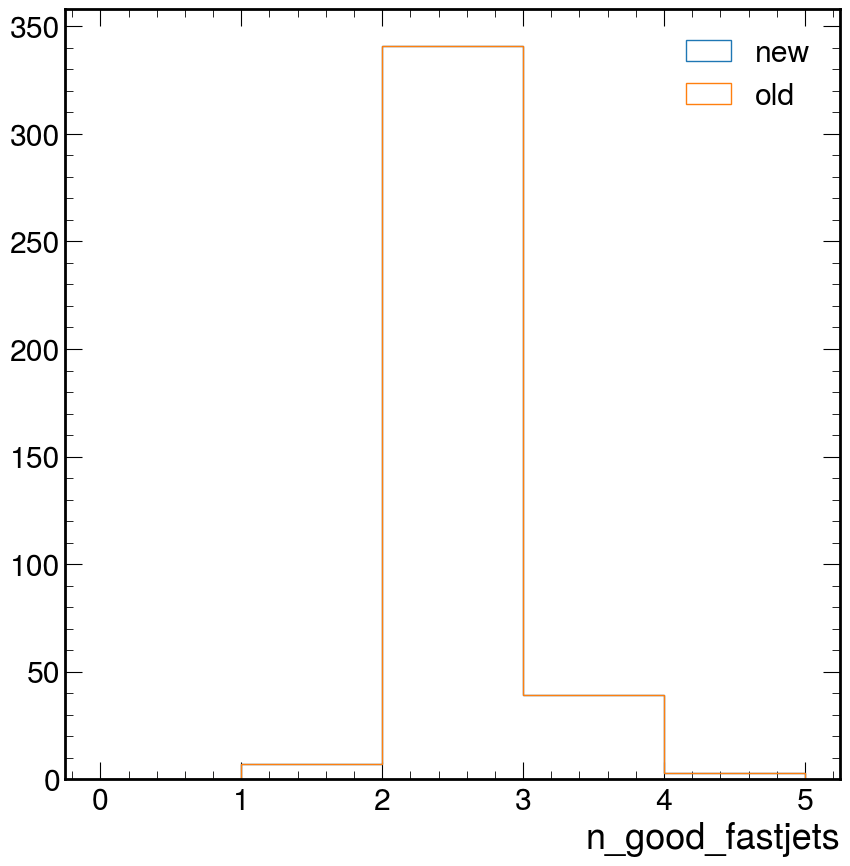

In [27]:
plt.hist(event_vars['ngood_fastjets'].to_numpy(), bins=5, range=(0,5), histtype='step', label='new')
plt.hist(event_vars_old['ngood_fastjets'].to_numpy(), bins=5, range=(0,5), histtype='step', label='old')
plt.xlabel('n_good_fastjets')
plt.legend()

In [7]:
for key in event_vars:
    if "Muon" in key or "muon" in key:
        print(key)

nMuons
nMuons_highPurity
nMuons_isPFcand
nMuons_looseId
nMuons_mediumId
nMuons_tightId
nMuons_triggerIdLoose
nMuons_isTracker
nMuons_category1
nMuons_category2
nMuons_category3
muon_pt_mean
muon_dxy_mean
muon_dz_mean
muon_ip3d_mean
muon_pt_leading
muon_pt_subleading
muon_miniPFRelIso_all_leading
muon_miniPFRelIso_all_subleading
muon_miniPFRelIso_all_mean
muon_l_sl_deltaphi
muon_l_sl_deltaeta
muon_l_sl_deltaR
muon_S1
muon_interIsolation_leading
muon_interIsolation_subleading
muon_interIsolation_subsubleading
nMuons_eta_ring


In [54]:
column = "muon_interIsolation_leading"
h = hist.Hist.new.Reg(50, 0, 3, name=column, label=column).Weight()
h.fill(event_vars[column].to_numpy(), weight=event_vars['genWeight'].to_numpy())

Hist(Regular(50, 0, 3, name='muon_interIsolation_leading'), storage=Weight()) # Sum: WeightedSum(value=785.641, variance=1080.16)

In [55]:
xsec = 1.325
lumi = 59817.406
weight = xsec * lumi / h.sum().value
h *= weight

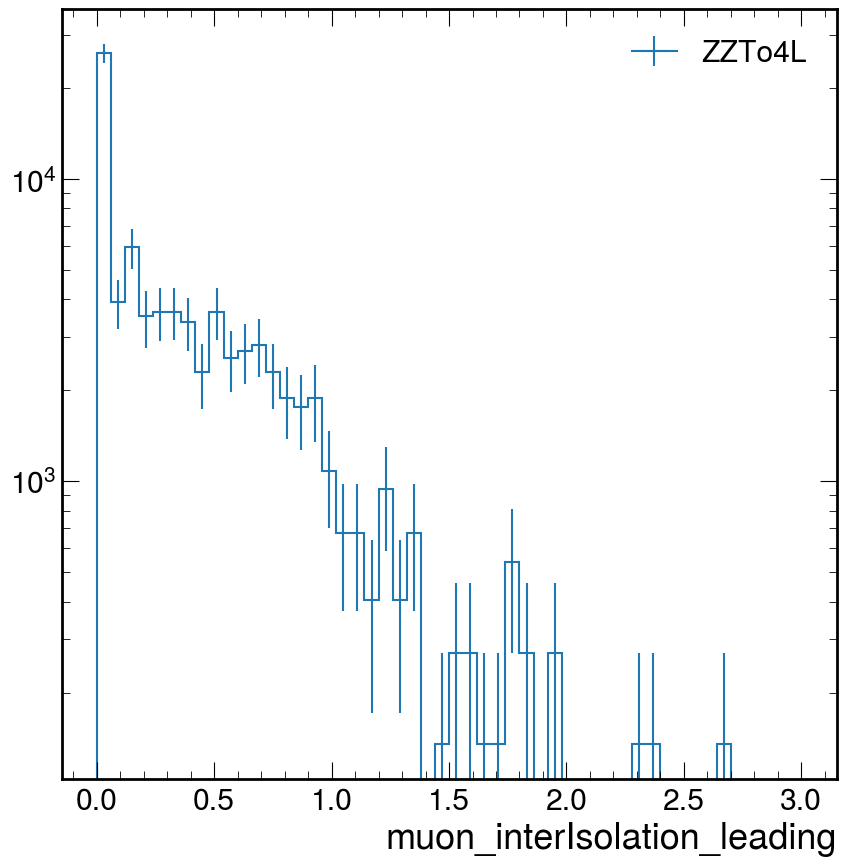

In [56]:
hep.histplot(h, yerr=np.sqrt(h.variances()), label='ZZTo4L')
plt.legend()
plt.yscale('log')

64909205.15625
64774388.28125


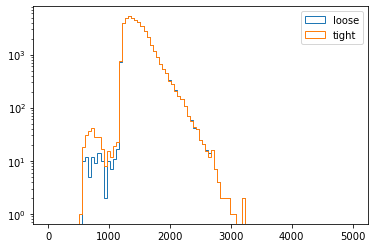

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))